**코랩에 LT파일 불러오기**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**IMPORT**

In [ ]:
import numpy as np
import pandas as pd
import datetime
import pickle
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import math
from bisect import bisect_left, bisect_right
from itertools import combinations
import seaborn as sns
import random
from copy import deepcopy
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from scipy.special import expit

**CSV파일 읽어오기**

In [ ]:
# fname='./NanumBarunGothic.otf'
# font = fm.FontProperties(fname = fname).get_name()
# plt.rcParams["font.family"] = font

board = pd.DataFrame({})
board = pd.read_csv('/content/drive/MyDrive/제목없는 폴더/LT3.csv', encoding='utf-8')
#board = pd.read_csv('LT2_lastweek.csv', encoding='utf-8')
lastRound = len(board) - 1
lastRound

1094

**지난주 분석결과**

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/제목없는 폴더/분석결과.csv', encoding='utf-8', index_col=0)

In [ ]:
data

,Num,Even,High,Win,WinLast5,WinLast10,WinLast15,WinLast20,WinLast25,WinLast30,WinLast35,Continuous,NotContinuous,EvenLast5,HighLast5
0,1.0,0.0,0.0,1.0,0.0,2.0,2.0,2.0,3.0,3.0,3.0,0.0,6.0,12.0,15.0
1,2.0,1.0,0.0,0.0,1.0,1.0,2.0,2.0,4.0,6.0,6.0,1.0,0.0,12.0,15.0
2,3.0,0.0,0.0,0.0,1.0,1.0,1.0,3.0,4.0,4.0,4.0,1.0,0.0,12.0,15.0
3,4.0,1.0,0.0,0.0,1.0,2.0,4.0,5.0,6.0,7.0,7.0,0.0,2.0,12.0,15.0
4,5.0,0.0,0.0,0.0,0.0,2.0,4.0,4.0,4.0,4.0,4.0,0.0,6.0,12.0,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47245,41.0,0.0,1.0,0.0,0.0,0.0,2.0,2.0,3.0,3.0,3.0,0.0,10.0,13.0,13.0
47246,42.0,1.0,1.0,0.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,0.0,13.0,13.0
47247,43.0,0.0,1.0,0.0,0.0,1.0,2.0,2.0,2.0,2.0,3.0,0.0,7.0,13.0,13.0
47248,44.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,0.0,4.0,13.0,13.0


**몇 회까지 분석 결과 담겨있나 체크(분석은 36회부터)**

In [ ]:
print(len(data)/45 + 35 , lastRound, '두 수가 같으면 최신화 되어 있는 것')

1085.0 1088 두 수가 같으면 최신화 되어 있는 것


**분석함수**

1.getRoundWinNum(round) : round 회차의 당첨숫자를 Series로 출력

2.getWinCount(round_from, round_to) : round_from회차부터 round_to 회차까지 1에서45 각 숫자가 나온 횟수를 result[i]에 담아 리턴

3.getLastNRoundCount(n, round_to) : round_to까지 최근 N회의 당첨 숫자 1에서45 숫자를 카운트해 2번 함수처럼 리스트로 출력

4.getWinContinuous(round_to) : 1에서45 각 숫자가 최근 연속 몇 회 나왔는지를 리스트로 출력

5.getNotWinContinuous(round_to) : 1에서45 각 숫자가 최근 연속 몇 회 안나왔는지를 리스트로 출력

6.getEvenNum(n, round_to) : round_n으로부터 최근 n회동안 짝수가 나온 횟수

7.getHighNum(n, round_to) : round_n으로부터 최근 n회동안 높은 수(23이상)가 나온 횟수


In [ ]:
def getRoundWinNum(round):
    return board.iloc[round][1:]

def getWinCount(round_from, round_to):
    result = [0] * 46

    for round in range(round_from, round_to + 1):
        winNum = getRoundWinNum(round)
        for i in range(6):
            result[winNum[i]] += 1
    return result

def getLastNRoundCount(n, round_to):
    round_from = round_to - n + 1
    return getWinCount(round_from, round_to)

def getWinContinuous(round_to):
    result = [0] * 46
    for num in range(1, 46):
        for round in range(round_to, 0, -1):
            if num in list(getRoundWinNum(round)):
                result[num] += 1
            else:
                break
    return result

def getNotWinContinuous(round_to):
    result = [0] * 46
    for num in range(1, 46):
        for round in range(round_to, 0, -1):
            if num not in list(getRoundWinNum(round)):
                result[num] += 1
            else:
                break
    return result

def getEvenNum(n, round_to):
    result = 0
    round_from = round_to - n + 1
    for round in range(round_from, round_to):
        for num in list(getRoundWinNum(round)):
            if num % 2 == 0:
                result += 1
    return result

def getHighNum(n, round_to):
    result = 0
    round_from = round_to - n + 1
    for round in range(round_from, round_to):
        for num in list(getRoundWinNum(round)):
            if num > 22:
                result += 1
    return result


**1. lastRound 최근 회차로 업데이트 하고 난 후 수행해서, 분석결과(data)에 넣어주기**

In [ ]:
# 최근회차만 업데이트
N_list = [5, 10, 15, 20, 25, 30, 35]
if len(data)/45 + 35 < lastRound:
  for round in range(lastRound, lastRound + 1):
    print(round)
    winLast = []
    evenLast = []
    highLast = []
    countinuous = getWinContinuous(round-1)
    not_countinuous = getNotWinContinuous(round-1)
    evenLast = getEvenNum(10, round-1)
    highLast = getHighNum(10, round-1)
    for n in N_list:
        winLast.append(getLastNRoundCount(n, round - 1))
        # evenLast.append(getEvenNum(n, round-1))
        # highLast.append(getHighNum(n, round-1))
    for i in range(1, 46):
        data_added = []
        data_added.append(i)
        data_added.append(1 if i % 2 == 0 else 0)
        data_added.append(1 if i > 22 else 0)
        data_added.append(1 if i in list(getRoundWinNum(round)) else 0)
        for n in range(len(N_list)):
            data_added.append(winLast[n][i])
        data_added.append(countinuous[i])
        data_added.append(not_countinuous[i])
        data_added.append(evenLast)
        data_added.append(highLast)
        # print(data_added)
        data.loc[len(data)] = data_added

1088


**2. 새로 분석하기**

In [ ]:
col = {}
to_add = ['Num', 'Even', 'High', 'Win']
for add in to_add:
  col[add] = []
for i in range(5, 36):
  col['WinLast'+str(i)] = []
to_add = ['Continuous', 'NotContinuous', 'EvenLast10', 'HighLast10']
for add in to_add:
  col[add] = []
print(col)
data = pd.DataFrame(col)
# data = pd.DataFrame(index=range(0, len(col)), columns = col)
data.columns

{'Num': [], 'Even': [], 'High': [], 'Win': [], 'WinLast5': [], 'WinLast6': [], 'WinLast7': [], 'WinLast8': [], 'WinLast9': [], 'WinLast10': [], 'WinLast11': [], 'WinLast12': [], 'WinLast13': [], 'WinLast14': [], 'WinLast15': [], 'WinLast16': [], 'WinLast17': [], 'WinLast18': [], 'WinLast19': [], 'WinLast20': [], 'WinLast21': [], 'WinLast22': [], 'WinLast23': [], 'WinLast24': [], 'WinLast25': [], 'WinLast26': [], 'WinLast27': [], 'WinLast28': [], 'WinLast29': [], 'WinLast30': [], 'WinLast31': [], 'WinLast32': [], 'WinLast33': [], 'WinLast34': [], 'WinLast35': [], 'Continuous': [], 'NotContinuous': [], 'EvenLast10': [], 'HighLast10': []}


Index(['Num', 'Even', 'High', 'Win', 'WinLast5', 'WinLast6', 'WinLast7',
       'WinLast8', 'WinLast9', 'WinLast10', 'WinLast11', 'WinLast12',
       'WinLast13', 'WinLast14', 'WinLast15', 'WinLast16', 'WinLast17',
       'WinLast18', 'WinLast19', 'WinLast20', 'WinLast21', 'WinLast22',
       'WinLast23', 'WinLast24', 'WinLast25', 'WinLast26', 'WinLast27',
       'WinLast28', 'WinLast29', 'WinLast30', 'WinLast31', 'WinLast32',
       'WinLast33', 'WinLast34', 'WinLast35', 'Continuous', 'NotContinuous',
       'EvenLast10', 'HighLast10'],
      dtype='object')

In [ ]:
N_list = [i for i in range(5, 36)]
for round in range(36, lastRound + 1):
    print(round)
    winLast = []
    evenLast = []
    highLast = []
    countinuous = getWinContinuous(round-1)
    not_countinuous = getNotWinContinuous(round-1)
    evenLast = getEvenNum(10, round-1)
    highLast = getHighNum(10, round-1)
    for n in N_list:
        winLast.append(getLastNRoundCount(n, round - 1))
        # evenLast.append(getEvenNum(n, round-1))
        # highLast.append(getHighNum(n, round-1))
    for i in range(1, 46):
        data_added = []
        data_added.append(i)
        data_added.append(1 if i % 2 == 0 else 0)
        data_added.append(1 if i > 22 else 0)
        data_added.append(7 if i in list(getRoundWinNum(round)) else -1)
        for n in range(len(N_list)):
            data_added.append(winLast[n][i])
        data_added.append(countinuous[i])
        data_added.append(not_countinuous[i])
        data_added.append(evenLast)
        data_added.append(highLast)
        # print(data_added)
        data.loc[len(data)] = data_added

36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
278
279
280
281
282
283
284
285
286
287
288
289
290
291
292
293
294
295
296
297
298
299
300
301


**분석결과 업데이트**

In [ ]:
data.to_csv('분석결과.csv')

In [ ]:
data

,Num,Even,High,Win,WinLast5,WinLast6,WinLast7,WinLast8,WinLast9,WinLast10,...,WinLast30,WinLast31,WinLast32,WinLast33,WinLast34,WinLast35,Continuous,NotContinuous,EvenLast10,HighLast10
0,1,0,0,7,0,0,1,1,2,2,...,3,3,3,3,3,3,0,6,25,30
1,2,1,0,-1,1,1,1,1,1,1,...,6,6,6,6,6,6,1,0,25,30
2,3,0,0,-1,1,1,1,1,1,1,...,4,4,4,4,4,4,1,0,25,30
3,4,1,0,-1,1,1,1,1,1,2,...,7,7,7,7,7,7,0,2,25,30
4,5,0,0,-1,0,0,1,1,1,2,...,4,4,4,4,4,4,0,6,25,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47650,41,0,1,-1,0,0,0,0,0,0,...,2,2,3,3,3,3,0,19,28,28
47651,42,1,1,-1,1,1,1,1,1,2,...,3,3,3,3,3,3,0,4,28,28
47652,43,0,1,-1,2,2,2,2,2,2,...,4,4,4,4,4,4,1,0,28,28
47653,44,1,1,-1,0,1,2,2,3,3,...,5,5,5,5,5,5,0,5,28,28


**분석 결과의 컬럼**

In [ ]:
data.columns

Index(['Num', 'Even', 'High', 'Win', 'WinLast5', 'WinLast6', 'WinLast7',
       'WinLast8', 'WinLast9', 'WinLast10', 'WinLast11', 'WinLast12',
       'WinLast13', 'WinLast14', 'WinLast15', 'WinLast16', 'WinLast17',
       'WinLast18', 'WinLast19', 'WinLast20', 'WinLast21', 'WinLast22',
       'WinLast23', 'WinLast24', 'WinLast25', 'WinLast26', 'WinLast27',
       'WinLast28', 'WinLast29', 'WinLast30', 'WinLast31', 'WinLast32',
       'WinLast33', 'WinLast34', 'WinLast35', 'Continuous', 'NotContinuous',
       'EvenLast10', 'HighLast10'],
      dtype='object')

**분석에 쓸 컬럼 결정**

input 데이터 컬럼

In [ ]:
target_cols = [
        'Even', 'High', 'WinLast5', 'WinLast6', 'WinLast7',
       'WinLast8', 'WinLast9', 'WinLast10', 'WinLast11', 'WinLast12',
       'WinLast13', 'WinLast14', 'WinLast15', 'WinLast16', 'WinLast17',
       'WinLast18', 'WinLast19', 'WinLast20', 'WinLast21', 'WinLast22',
       'WinLast23', 'WinLast24', 'WinLast25', 'WinLast26', 'WinLast27',
       'WinLast28', 'WinLast29', 'WinLast30', 'WinLast31', 'WinLast32',
       'WinLast33', 'WinLast34', 'WinLast35', 'Continuous', 'NotContinuous',
       'EvenLast10', 'HighLast10'] # 2023-10-09 변경 전(4등 당첨)


# target_cols = [
#         'Even', 'High', 'WinLast5', 'WinLast6', 'WinLast7',
#        'WinLast8', 'WinLast9', 'WinLast10', 'WinLast11', 'WinLast12',
#        'WinLast13', 'WinLast14', 'WinLast15', 'WinLast16', 'WinLast17',
#        'WinLast18', 'WinLast19', 'WinLast20', 'WinLast21', 'WinLast22',
#        'WinLast23', 'WinLast24', 'WinLast25', 'WinLast26', 'WinLast27',
#        'WinLast28', 'WinLast29', 'WinLast30', 'Continuous', 'NotContinuous',
#        'EvenLast10', 'HighLast10'] # 2023-10-09 변경 후

data_input = data[target_cols].to_numpy()

target 데이터 컬럼(당첨여부)

In [ ]:
data_target = data['Win'].to_numpy()

**텐서플로우**


In [ ]:
import tensorflow as tf
import pandas as pd
data_input = data[target_cols].to_numpy()
data_target = data['Win'].to_numpy()

In [ ]:
print(data_input.shape, data_target.shape)

(47655, 37) (47655,)


In [ ]:
X = tf.keras.layers.Input(shape=[37])
# X = tf.keras.layers.Input(shape=[32]) # 2023-10-09 변경
Y = tf.keras.layers.Dense(1)(X)
model = tf.keras.models.Model(X, Y)
model.compile(loss='mse')

In [ ]:
model.fit(data_input, data_target, epochs=10)

Epoch 1/10
1490/1490 [==============================] - 4s 2ms/step - loss: 8.2377
Epoch 2/10
1490/1490 [==============================] - 2s 2ms/step - loss: 7.5148
Epoch 3/10
1490/1490 [==============================] - 2s 2ms/step - loss: 7.4940
Epoch 4/10
1490/1490 [==============================] - 2s 2ms/step - loss: 7.4829
Epoch 5/10
1490/1490 [==============================] - 3s 2ms/step - loss: 7.4769
Epoch 6/10
1490/1490 [==============================] - 3s 2ms/step - loss: 7.4712
Epoch 7/10
1490/1490 [==============================] - 3s 2ms/step - loss: 7.4609
Epoch 8/10
1490/1490 [==============================] - 3s 2ms/step - loss: 7.4552
Epoch 9/10
1490/1490 [==============================] - 2s 2ms/step - loss: 7.4565
Epoch 10/10
1490/1490 [==============================] - 2s 2ms/step - loss: 7.4566


In [ ]:
model.fit(data_input, data_target, epochs=10)

Epoch 1/10
1490/1490 [==============================] - 2s 2ms/step - loss: 7.4499
Epoch 2/10
1490/1490 [==============================] - 3s 2ms/step - loss: 7.4478
Epoch 3/10
1490/1490 [==============================] - 3s 2ms/step - loss: 7.4468
Epoch 4/10
1490/1490 [==============================] - 3s 2ms/step - loss: 7.4431
Epoch 5/10
1490/1490 [==============================] - 2s 2ms/step - loss: 7.4451
Epoch 6/10
1490/1490 [==============================] - 2s 2ms/step - loss: 7.4450
Epoch 7/10
1490/1490 [==============================] - 2s 2ms/step - loss: 7.4391
Epoch 8/10
1490/1490 [==============================] - 2s 2ms/step - loss: 7.4422
Epoch 9/10
1490/1490 [==============================] - 3s 2ms/step - loss: 7.4397
Epoch 10/10
1490/1490 [==============================] - 3s 2ms/step - loss: 7.4378


In [ ]:
model.fit(data_input, data_target, epochs=30, verbose=0)

In [ ]:
model.fit(data_input, data_target, epochs=10) # 보통 7.43 정도 되는듯

Epoch 1/10
1490/1490 [==============================] - 2s 2ms/step - loss: 7.4325
Epoch 2/10
1490/1490 [==============================] - 2s 2ms/step - loss: 7.4348
Epoch 3/10
1490/1490 [==============================] - 3s 2ms/step - loss: 7.4303
Epoch 4/10
1490/1490 [==============================] - 3s 2ms/step - loss: 7.4355
Epoch 5/10
1490/1490 [==============================] - 3s 2ms/step - loss: 7.4342
Epoch 6/10
1490/1490 [==============================] - 2s 2ms/step - loss: 7.4362
Epoch 7/10
1490/1490 [==============================] - 2s 2ms/step - loss: 7.4337
Epoch 8/10
1490/1490 [==============================] - 2s 2ms/step - loss: 7.4280
Epoch 9/10
1490/1490 [==============================] - 3s 2ms/step - loss: 7.4300
Epoch 10/10
1490/1490 [==============================] - 3s 2ms/step - loss: 7.4293


In [ ]:
# 다음회차 기준으로 입력값 출력
col = {}
to_add = ['Num', 'Even', 'High', 'Win']
for add in to_add:
  col[add] = []
for i in range(5, 36):
  col['WinLast'+str(i)] = []
to_add = ['Continuous', 'NotContinuous', 'EvenLast10', 'HighLast10']
for add in to_add:
  col[add] = []
print(col)
next_round = pd.DataFrame(col)
N_list = [i for i in range(5, 36)]

for round in range(lastRound + 1, lastRound + 2):
    print(round)
    winLast = []
    evenLast = []
    highLast = []
    countinuous = getWinContinuous(round-1)
    not_countinuous = getNotWinContinuous(round-1)
    evenLast = getEvenNum(10, round-1)
    highLast = getHighNum(10, round-1)
    for n in N_list:
        winLast.append(getLastNRoundCount(n, round - 1))
        # evenLast.append(getEvenNum(n, round-1))
        # highLast.append(getHighNum(n, round-1))
    for i in range(1, 46):
        data_added = []
        data_added.append(i)
        data_added.append(1 if i % 2 == 0 else 0)
        data_added.append(1 if i > 22 else 0)
        data_added.append(-1)
        for n in range(len(N_list)):
            data_added.append(winLast[n][i])
        data_added.append(countinuous[i])
        data_added.append(not_countinuous[i])
        data_added.append(evenLast)
        data_added.append(highLast)
        # print(data_added)
        # next_round.append(data_added)
        next_round.loc[len(next_round)] = data_added
print(next_round)

{'Num': [], 'Even': [], 'High': [], 'Win': [], 'WinLast5': [], 'WinLast6': [], 'WinLast7': [], 'WinLast8': [], 'WinLast9': [], 'WinLast10': [], 'WinLast11': [], 'WinLast12': [], 'WinLast13': [], 'WinLast14': [], 'WinLast15': [], 'WinLast16': [], 'WinLast17': [], 'WinLast18': [], 'WinLast19': [], 'WinLast20': [], 'WinLast21': [], 'WinLast22': [], 'WinLast23': [], 'WinLast24': [], 'WinLast25': [], 'WinLast26': [], 'WinLast27': [], 'WinLast28': [], 'WinLast29': [], 'WinLast30': [], 'WinLast31': [], 'WinLast32': [], 'WinLast33': [], 'WinLast34': [], 'WinLast35': [], 'Continuous': [], 'NotContinuous': [], 'EvenLast10': [], 'HighLast10': []}
1095
    Num  Even  High  Win  WinLast5  WinLast6  WinLast7  WinLast8  WinLast9  \
0     1     0     0   -1         0         0         0         0         0   
1     2     1     0   -1         0         0         0         0         0   
2     3     0     0   -1         0         0         0         0         0   
3     4     1     0   -1         0     

In [ ]:
target_cols = [
        'Even', 'High', 'WinLast5', 'WinLast6', 'WinLast7',
       'WinLast8', 'WinLast9', 'WinLast10', 'WinLast11', 'WinLast12',
       'WinLast13', 'WinLast14', 'WinLast15', 'WinLast16', 'WinLast17',
       'WinLast18', 'WinLast19', 'WinLast20', 'WinLast21', 'WinLast22',
       'WinLast23', 'WinLast24', 'WinLast25', 'WinLast26', 'WinLast27',
       'WinLast28', 'WinLast29', 'WinLast30', 'WinLast31', 'WinLast32',
       'WinLast33', 'WinLast34', 'WinLast35', 'Continuous', 'NotContinuous',
       'EvenLast10', 'HighLast10']

# target_cols = [
#         'Even', 'High', 'WinLast5', 'WinLast6', 'WinLast7',
#        'WinLast8', 'WinLast9', 'WinLast10', 'WinLast11', 'WinLast12',
#        'WinLast13', 'WinLast14', 'WinLast15', 'WinLast16', 'WinLast17',
#        'WinLast18', 'WinLast19', 'WinLast20', 'WinLast21', 'WinLast22',
#        'WinLast23', 'WinLast24', 'WinLast25', 'WinLast26', 'WinLast27',
#        'WinLast28', 'WinLast29', 'WinLast30', 'Continuous', 'NotContinuous',
#        'EvenLast10', 'HighLast10'] # 2023-10-09 변경 후
predict_input = next_round[target_cols].to_numpy()

In [ ]:
result = model.predict(predict_input)

2/2 [==============================] - 0s 10ms/step


In [ ]:
tmp = dict()
for ind in range(len(result)):
  i = result[ind]
  tmp[ind+1]=float(i)
tmp

{1: -0.44703641533851624,
 2: -0.2188415825366974,
 3: -0.2473379671573639,
 4: -0.3799314796924591,
 5: -0.2615862488746643,
 6: -0.40659818053245544,
 7: -0.49127450585365295,
 8: -0.15711259841918945,
 9: -0.2559545338153839,
 10: -0.17662793397903442,
 11: -0.15401142835617065,
 12: -0.19344669580459595,
 13: -0.24891498684883118,
 14: -0.2600483000278473,
 15: -0.25699207186698914,
 16: -0.27823278307914734,
 17: -0.28213658928871155,
 18: -0.5714272856712341,
 19: -0.22344240546226501,
 20: -0.1685885787010193,
 21: -0.37667253613471985,
 22: -0.5629269480705261,
 23: -0.5034768581390381,
 24: -0.3763008415699005,
 25: -0.10847293585538864,
 26: -0.41428253054618835,
 27: -0.2722069323062897,
 28: -0.285824716091156,
 29: -0.20268961787223816,
 30: -0.3290121257305145,
 31: -0.29580530524253845,
 32: -0.2606448829174042,
 33: -0.1785891354084015,
 34: -0.29174840450286865,
 35: -0.4132785499095917,
 36: -0.1768195629119873,
 37: -0.17087849974632263,
 38: -0.5088417530059814,
 39

In [ ]:
tmp_sorted = sorted(tmp.items(), key=lambda x: -x[1])
tmp_sorted

[(25, -0.10847293585538864),
 (39, -0.13684797286987305),
 (11, -0.15401142835617065),
 (8, -0.15711259841918945),
 (20, -0.1685885787010193),
 (37, -0.17087849974632263),
 (41, -0.17314818501472473),
 (10, -0.17662793397903442),
 (36, -0.1768195629119873),
 (33, -0.1785891354084015),
 (12, -0.19344669580459595),
 (29, -0.20268961787223816),
 (2, -0.2188415825366974),
 (19, -0.22344240546226501),
 (40, -0.22630605101585388),
 (45, -0.24106153845787048),
 (3, -0.2473379671573639),
 (13, -0.24891498684883118),
 (9, -0.2559545338153839),
 (15, -0.25699207186698914),
 (14, -0.2600483000278473),
 (32, -0.2606448829174042),
 (5, -0.2615862488746643),
 (27, -0.2722069323062897),
 (16, -0.27823278307914734),
 (17, -0.28213658928871155),
 (43, -0.28265276551246643),
 (28, -0.285824716091156),
 (34, -0.29174840450286865),
 (31, -0.29580530524253845),
 (30, -0.3290121257305145),
 (24, -0.3763008415699005),
 (21, -0.37667253613471985),
 (4, -0.3799314796924591),
 (42, -0.3834231197834015),
 (6, -0

In [ ]:
top_23 = []
top_11 = []
top_4 = []
for i in range(23):
  top_23.append(tmp_sorted[i][0])
  if i < 11:
    top_11.append(tmp_sorted[i][0])
  if i < 4:
    top_4.append(tmp_sorted[i][0])
top_23, top_11

([25,
  39,
  11,
  8,
  20,
  37,
  41,
  10,
  36,
  33,
  12,
  29,
  2,
  19,
  40,
  45,
  3,
  13,
  9,
  15,
  14,
  32,
  5],
 [25, 39, 11, 8, 20, 37, 41, 10, 36, 33, 12])

In [ ]:
nums = [i for i in range(1, 46)]
for i in range(1, 46):
  tmp[i] += 1
cnt = 0
while cnt < 20:
  res = random.choices(nums,weights=list(tmp.values()), k=6)

  res.sort()
  cont = False
  for j in range(1, 6):
    if res[j] == res[j-1]:
      cont = True
  if cont:
    cnt += 1
  print(res)

{1: -0.44703641533851624, 2: -0.2188415825366974, 3: -0.2473379671573639, 4: -0.3799314796924591, 5: -0.2615862488746643, 6: -0.40659818053245544, 7: -0.49127450585365295, 8: -0.15711259841918945, 9: -0.2559545338153839, 10: -0.17662793397903442, 11: -0.15401142835617065, 12: -0.19344669580459595, 13: -0.24891498684883118, 14: -0.2600483000278473, 15: -0.25699207186698914, 16: -0.27823278307914734, 17: -0.28213658928871155, 18: -0.5714272856712341, 19: -0.22344240546226501, 20: -0.1685885787010193, 21: -0.37667253613471985, 22: -0.5629269480705261, 23: -0.5034768581390381, 24: -0.3763008415699005, 25: -0.10847293585538864, 26: -0.41428253054618835, 27: -0.2722069323062897, 28: -0.285824716091156, 29: -0.20268961787223816, 30: -0.3290121257305145, 31: -0.29580530524253845, 32: -0.2606448829174042, 33: -0.1785891354084015, 34: -0.29174840450286865, 35: -0.4132785499095917, 36: -0.1768195629119873, 37: -0.17087849974632263, 38: -0.5088417530059814, 39: -0.13684797286987305, 40: -0.2263060

In [ ]:
nums = [i for i in range(1, 46)]
print(nums)
cnt_total = 0
while True:
  res = random.choices(nums,weights=list(tmp.values()), k=6)
  # print(res)
  cnt = 0
  cnt1 = 0
  cnt2 = 0
  for j in range(6):
    if res[j] in top_23:
      cnt += 1
    # if res[j] in top_11:
    #   cnt1 += 1
    # if res[j] in top_4:
    #   cnt2 += 1
  if cnt < 3 or cnt == 6:
    continue

  # print(cnt, '1번통과')
  # if cnt1 < 2 or cnt1 > 4:
  #   continue
  # if cnt2 < 1 or cnt2 > 2:
  #   continue
  cnt = 0
  cnt1 = 0
  cnt2 = 0
  for j in range(6):
    if res[j] in [k for k in range(23, 46)]:
      cnt1 += 1
  if cnt1 == 0 or cnt1 == 6:
    continue
  cnt1 = 0
  for j in range(6):
    if res[j] % 2 == 0:
      cnt1 += 1
  if cnt1 == 0 or cnt1 == 6:
    continue
  cnt1 = 0
  for j in range(6):
    if res[j] in getRoundWinNum(lastRound):
      cnt1 += 1
  if cnt1 >= 3:
    continue
  res.sort()
  cont = False
  for j in range(1, 6):
    if res[j] == res[j-1]:
      cont = True
  if cont:
    continue
  print(res)
  cnt_total += 1
  if cnt_total == 20:
    break

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45]
[11, 13, 25, 26, 36, 41]
[9, 26, 27, 30, 40, 41]
[3, 14, 18, 19, 21, 37]
[8, 19, 25, 29, 43, 44]
[2, 8, 16, 20, 30, 31]
[3, 8, 11, 15, 35, 42]
[5, 6, 19, 27, 39, 43]
[9, 27, 29, 33, 34, 36]
[5, 8, 14, 21, 28, 41]
[5, 10, 23, 33, 41, 42]
[3, 4, 12, 28, 40, 43]
[3, 6, 8, 19, 27, 43]
[3, 6, 17, 20, 22, 25]
[1, 3, 8, 33, 36, 41]
[3, 7, 13, 20, 39, 43]
[4, 10, 13, 20, 39, 43]
[5, 11, 15, 23, 33, 40]
[8, 11, 13, 30, 34, 35]
[5, 11, 12, 19, 26, 35]
[4, 6, 9, 13, 15, 24]


**분석(k-means)**

learning, test 데이터 분할

In [ ]:
train_input, test_input, train_target, test_target = train_test_split(data_input, data_target) # 21:88.4, 83.2, 30: 88.4, 83.4, 10:88.5 ,83.1 , 40: 88.4, 83.6. 35:88.4, 83.19

Scaling 과 fitting 및 분석 점수

In [ ]:
ss = StandardScaler()
# ss = MinMaxScaler()
# ss = RobustScaler()
# ss = Normalizer()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)
kn = KNeighborsClassifier(n_neighbors=3)
kn.fit(train_scaled, train_target)
print(kn.score(train_scaled, train_target))
print(kn.score(test_scaled, test_target))

0.8859530643255107
0.8318561661180045


In [ ]:
print(kn.classes_)

[-1  7]


**다음주에 1에서 45숫자 중, 각 숫자의 등장 확률 구하기**

In [ ]:
result = kn.predict(test_scaled[-45:])
winnum = getRoundWinNum(lastRound)
for i in range(45):
  print(i + 1, result[i], 1 if i+1 in list(winnum) else 0)

1 -1 0
2 -1 0
3 -1 0
4 -1 0
5 -1 0
6 -1 0
7 -1 0
8 -1 0
9 -1 0
10 -1 0
11 -1 1
12 -1 0
13 -1 0
14 -1 0
15 -1 0
16 -1 0
17 -1 0
18 -1 0
19 -1 0
20 -1 0
21 -1 1
22 -1 1
23 -1 0
24 -1 0
25 -1 0
26 -1 0
27 -1 0
28 -1 0
29 -1 0
30 -1 1
31 -1 0
32 -1 0
33 -1 0
34 -1 0
35 -1 0
36 -1 0
37 -1 0
38 7 0
39 7 1
40 -1 0
41 -1 0
42 -1 0
43 -1 0
44 -1 1
45 -1 0


In [ ]:
proba = kn.predict_proba(test_scaled[-45:])
result = np.round(proba, decimals=4)
score = 0
for i in range(len(result)):
  print(i+1, result[i], 1 if i+1 in list(winnum) else 0)
  if i+i in list(winnum):
    score += result[i][1]
score

1 [1. 0.] 0
2 [1. 0.] 0
3 [1. 0.] 0
4 [0.6667 0.3333] 0
5 [1. 0.] 0
6 [1. 0.] 0
7 [1. 0.] 0
8 [1. 0.] 0
9 [1. 0.] 0
10 [1. 0.] 0
11 [0.6667 0.3333] 1
12 [1. 0.] 0
13 [0.6667 0.3333] 0
14 [1. 0.] 0
15 [1. 0.] 0
16 [0.6667 0.3333] 0
17 [1. 0.] 0
18 [1. 0.] 0
19 [0.6667 0.3333] 0
20 [1. 0.] 0
21 [0.6667 0.3333] 1
22 [0.6667 0.3333] 1
23 [0.6667 0.3333] 0
24 [1. 0.] 0
25 [1. 0.] 0
26 [1. 0.] 0
27 [1. 0.] 0
28 [1. 0.] 0
29 [1. 0.] 0
30 [1. 0.] 1
31 [1. 0.] 0
32 [1. 0.] 0
33 [1. 0.] 0
34 [1. 0.] 0
35 [1. 0.] 0
36 [1. 0.] 0
37 [0.6667 0.3333] 0
38 [0.3333 0.6667] 0
39 [0.3333 0.6667] 1
40 [0.6667 0.3333] 0
41 [0.6667 0.3333] 0
42 [1. 0.] 0
43 [0.6667 0.3333] 0
44 [1. 0.] 1
45 [1. 0.] 0


0.6666

**분석 - 로지스틱 회귀**

In [ ]:
win_lose_indexes = (train_target == 7) | (train_target == -1)
train_win_lose = train_scaled[win_lose_indexes]
target_win_lose = train_target[win_lose_indexes]

In [ ]:
lr = LogisticRegression()
lr.fit(train_win_lose, target_win_lose)

LogisticRegression()

**최근 회차 예측 결과**

In [ ]:
print(lr.predict(train_win_lose[-45:]))

[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]


In [ ]:
result = lr.predict_proba(train_win_lose[-45:])
score = 0
for i in range(len(result)):
  print(i+1, result[i], 1 if i+1 in list(winnum) else 0)
  if i+i in list(winnum):
    score += result[i][1]
print(score)
ss

1 [0.83830816 0.16169184] 0
2 [0.86886588 0.13113412] 0
3 [0.85742233 0.14257767] 0
4 [0.87710062 0.12289938] 0
5 [0.86005981 0.13994019] 0
6 [0.86393851 0.13606149] 0
7 [0.867964 0.132036] 0
8 [0.84667505 0.15332495] 0
9 [0.87212532 0.12787468] 0
10 [0.86236549 0.13763451] 0
11 [0.84665691 0.15334309] 0
12 [0.85971581 0.14028419] 0
13 [0.86105166 0.13894834] 1
14 [0.85841314 0.14158686] 1
15 [0.84554244 0.15445756] 0
16 [0.86577223 0.13422777] 0
17 [0.87384441 0.12615559] 0
18 [0.87490513 0.12509487] 1
19 [0.86015809 0.13984191] 0
20 [0.88083525 0.11916475] 0
21 [0.84680417 0.15319583] 1
22 [0.87296972 0.12703028] 0
23 [0.86266832 0.13733168] 0
24 [0.87954247 0.12045753] 0
25 [0.85626131 0.14373869] 0
26 [0.87965462 0.12034538] 0
27 [0.87215931 0.12784069] 0
28 [0.88065774 0.11934226] 0
29 [0.87039724 0.12960276] 0
30 [0.85507804 0.14492196] 0
31 [0.87200794 0.12799206] 0
32 [0.87016172 0.12983828] 0
33 [0.8546903 0.1453097] 0
34 [0.86685813 0.13314187] 1
35 [0.8687218 0.1312782] 0
36

StandardScaler()

**로지스틱 회귀 계수 확인 및 활용**

z = 계수[0] * 분석용컬럼[0] + 계수[1] * 분석용컬럼[1] + ...

이를 활용해서 다음회차 1에서 45 각 수의 z값 및 등장 확률 구하기

In [ ]:
lr_result = []
lr1 = lr.coef_
lr2 = lr.intercept_
for i in lr1:
  for j in i:
    # print(j)
    lr_result.append(j)
# print(lr2[0])
lr_result.append(lr2[0])
for i in range(len(lr_result) - 1):
  print(target_cols[i], lr_result[i])

Even -0.004303369229034899
High -0.020819754610804042
WinLast5 0.012373433079262093
WinLast6 -0.058533737185946615
WinLast7 0.014265231150492896
WinLast8 -0.05923944349795931
WinLast9 0.14321916807242072
WinLast10 -0.06954542579656572
WinLast11 0.057524927522665505
WinLast12 0.041569770254016945
WinLast13 -0.06333952940347895
WinLast14 -0.01690640979130567
WinLast15 -0.12694190337742192
WinLast16 0.06622147773612627
WinLast17 0.03256946368532906
WinLast18 -0.16032738256609236
WinLast19 0.23582002652716214
WinLast20 -0.07405537524626485
WinLast21 0.0019885097691813456
WinLast22 -0.032414472413088244
WinLast23 0.12009461640262034
WinLast24 -0.11968368065436807
WinLast25 0.04904985182642514
WinLast26 0.015139721432385114
WinLast27 -0.018067616857029088
WinLast28 0.021492893365069436
WinLast29 -0.19733564712217755
WinLast30 0.3180026149592012
WinLast31 -0.13279546184211052
WinLast32 -0.06347900986541863
WinLast33 0.02196072731578858
WinLast34 0.07898253620267895
WinLast35 -0.05192852395880

최근 결과로 다음주 예측하기
대상컬럼

data_input = data[['Even', 'High', 'WinLast10',
       'WinLast15', 'WinLast20', 'WinLast25', 'WinLast30', 'WinLast35',
       'Continuous', 'NotContinuous', 'EvenLast5', 'HighLast5']].to_numpy()

In [ ]:
target_cols

['Even',
 'High',
 'WinLast5',
 'WinLast6',
 'WinLast7',
 'WinLast8',
 'WinLast9',
 'WinLast10',
 'WinLast11',
 'WinLast12',
 'WinLast13',
 'WinLast14',
 'WinLast15',
 'WinLast16',
 'WinLast17',
 'WinLast18',
 'WinLast19',
 'WinLast20',
 'WinLast21',
 'WinLast22',
 'WinLast23',
 'WinLast24',
 'WinLast25',
 'WinLast26',
 'WinLast27',
 'WinLast28',
 'WinLast29',
 'WinLast30',
 'WinLast31',
 'WinLast32',
 'WinLast33',
 'WinLast34',
 'WinLast35',
 'Continuous',
 'NotContinuous',
 'EvenLast10',
 'HighLast10']

In [ ]:

N_list = [i for i in range(5, 36)]
result = [0] * 46
round = lastRound
print(round)
winLast = []
evenLast = []
highLast = []
countinuous = getWinContinuous(round-1)
not_countinuous = getNotWinContinuous(round-1)
evenLast = getEvenNum(10, round-1)
highLast = getHighNum(10, round-1)
for n in N_list:
    winLast.append(getLastNRoundCount(n, round - 1))
    # evenLast.append(getEvenNum(n, round-1))
    # highLast.append(getHighNum(n, round-1))
for i in range(1, 46):
    data_added = []
    data_added.append(1 if i % 2 == 0 else 0)
    data_added.append(1 if i > 22 else 0)
    # data_added.append(7 if i in list(getRoundWinNum(round)) else 0)
    for n in range(len(N_list)):
        data_added.append(winLast[n][i])
    data_added.append(countinuous[i])
    data_added.append(not_countinuous[i])
    data_added.append(evenLast)
    data_added.append(highLast)
    # print(data_added)
    # data.loc[len(data)] = data_added
    result[i] = data_added

1085


각 컬럼 값에 계수 곱해서 확률 구하기

In [ ]:
percent_tmp = []
for i in range(1,46):
  tmp = 0
  for j in range(12):
    tmp += result[i][j] * lr_result[j]
  percent_tmp.append(tmp + lr_result[12])
percent = dict()
for p in range(1, 46):
  # percent.append(expit(percent_tmp[p-1]))
  percent[p] = expit(percent_tmp[p-1])

sorted_percent = sorted(percent.items(), key=lambda x : -x[1])
print(sorted_percent)
list(percent.values())

[(36, 0.4973484614950895), (3, 0.49174289621700346), (7, 0.49174289621700346), (9, 0.49174289621700346), (33, 0.4865404593259904), (37, 0.4834498967531841), (14, 0.4794343593922834), (10, 0.47908796027674366), (17, 0.4766023896086757), (11, 0.4759435819523824), (6, 0.47414199126581946), (8, 0.4731359744766271), (4, 0.47278999300667796), (40, 0.4703393732061448), (13, 0.4689983359778904), (15, 0.46865268880183175), (5, 0.468307071702386), (19, 0.468307071702386), (27, 0.468161907083619), (41, 0.46781633325941846), (12, 0.46758122141069064), (22, 0.46758122141069064), (38, 0.46495333073056777), (21, 0.46444502966031864), (29, 0.4634717771927401), (31, 0.4634717771927401), (25, 0.4631266506483137), (39, 0.4631266506483137), (2, 0.46302967623610325), (42, 0.46274689872510794), (26, 0.4624018467569186), (34, 0.4624018467569186), (28, 0.457132389474076), (1, 0.4565329412399055), (30, 0.45651896986972745), (20, 0.4519877771964863), (43, 0.4514721068520502), (44, 0.44982601001791206), (16, 0.4

[0.4565329412399055,
 0.46302967623610325,
 0.49174289621700346,
 0.47278999300667796,
 0.468307071702386,
 0.47414199126581946,
 0.49174289621700346,
 0.4731359744766271,
 0.49174289621700346,
 0.47908796027674366,
 0.4759435819523824,
 0.46758122141069064,
 0.4689983359778904,
 0.4794343593922834,
 0.46865268880183175,
 0.4480097857375256,
 0.4766023896086757,
 0.43508033833776805,
 0.468307071702386,
 0.4519877771964863,
 0.46444502966031864,
 0.46758122141069064,
 0.4314522900143573,
 0.44710882793152873,
 0.4631266506483137,
 0.4624018467569186,
 0.468161907083619,
 0.457132389474076,
 0.4634717771927401,
 0.45651896986972745,
 0.4634717771927401,
 0.43300550553746464,
 0.4865404593259904,
 0.4624018467569186,
 0.4463659605384661,
 0.4973484614950895,
 0.4834498967531841,
 0.46495333073056777,
 0.4631266506483137,
 0.4703393732061448,
 0.46781633325941846,
 0.46274689872510794,
 0.4514721068520502,
 0.44982601001791206,
 0.44782962905420864]

**확률 기반으로 추천 수 뽑기**

상위 23개에서 4개 이상, 6개 전부는 제외

In [ ]:
nums = [i for i in range(1, 46)]
for i in range(20):
  print(random.choices(nums,weights=list(percent.values()), k=6))

[29, 10, 7, 38, 25, 32]
[42, 1, 5, 21, 38, 12]
[32, 35, 18, 11, 10, 8]
[15, 9, 14, 35, 45, 32]
[27, 27, 1, 8, 14, 22]
[5, 40, 3, 43, 34, 10]
[17, 9, 32, 24, 3, 9]
[7, 34, 7, 43, 27, 18]
[12, 18, 12, 9, 9, 6]
[29, 6, 44, 39, 20, 18]
[7, 41, 31, 38, 26, 16]
[42, 42, 28, 33, 25, 13]
[42, 12, 34, 27, 39, 9]
[34, 21, 15, 8, 9, 39]
[5, 21, 3, 41, 3, 4]
[18, 31, 45, 14, 16, 33]
[43, 4, 34, 11, 28, 12]
[23, 14, 38, 31, 6, 18]
[13, 28, 13, 29, 38, 16]
[19, 28, 14, 18, 8, 21]


**분석 - 결정 트리**

In [ ]:
!pip install sklearn.tree

ERROR: Could not find a version that satisfies the requirement sklearn.tree (from versions: none)
ERROR: No matching distribution found for sklearn.tree


In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(train_scaled, train_target)
print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

0.9995767136044248
0.7473122830779649


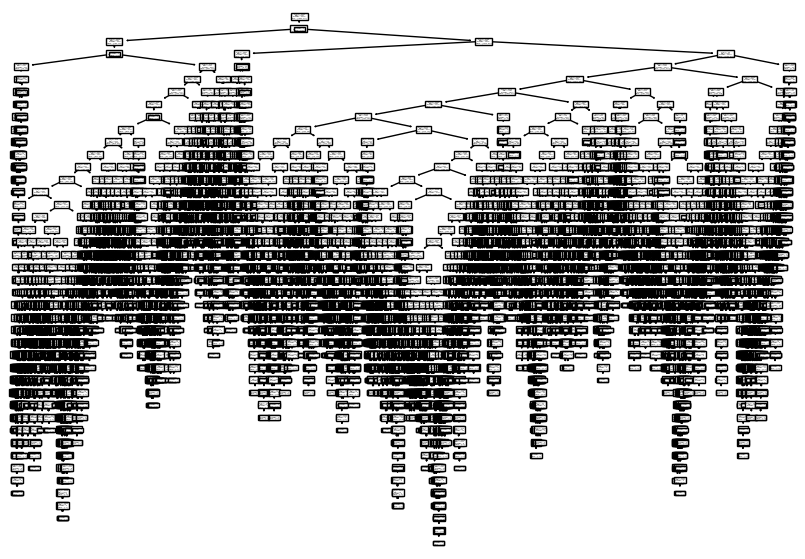

In [ ]:
from sklearn.tree import plot_tree
plt.figure(figsize=(10,7))
plot_tree(dt)
plt.show()

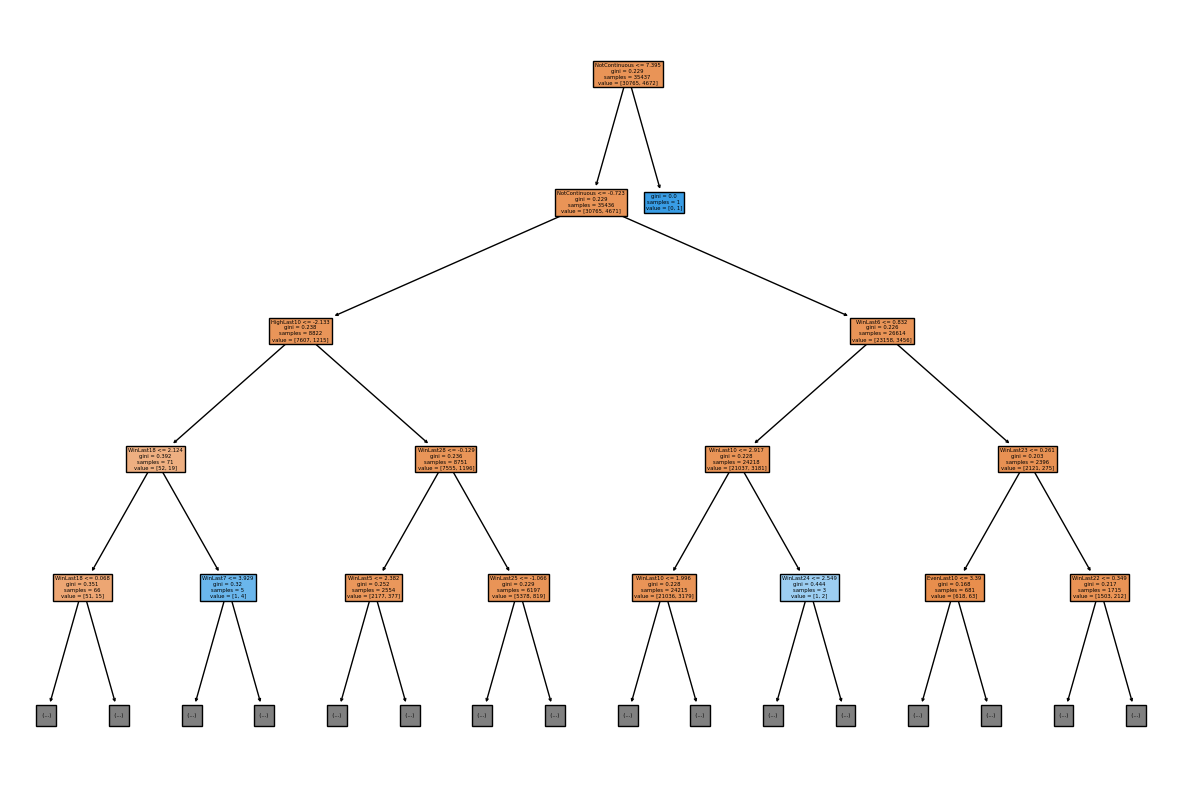

In [ ]:
plt.figure(figsize=(15,10))
plot_tree(dt, max_depth=4, filled=True, feature_names=['Even',
 'High',
 'WinLast5',
 'WinLast6',
 'WinLast7',
 'WinLast8',
 'WinLast9',
 'WinLast10',
 'WinLast11',
 'WinLast12',
 'WinLast13',
 'WinLast14',
 'WinLast15',
 'WinLast16',
 'WinLast17',
 'WinLast18',
 'WinLast19',
 'WinLast20',
 'WinLast21',
 'WinLast22',
 'WinLast23',
 'WinLast24',
 'WinLast25',
 'WinLast26',
 'WinLast27',
 'WinLast28',
 'WinLast29',
 'WinLast30',
 'WinLast31',
 'WinLast32',
 'WinLast33',
 'WinLast34',
 'WinLast35',
 'Continuous',
 'NotContinuous',
 'EvenLast10',
 'HighLast10'])
plt.show()

In [ ]:
dt = DecisionTreeClassifier(max_depth=6)
dt.fit(train_scaled, train_target)
print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

0.8684425882552135
0.8618471175823246


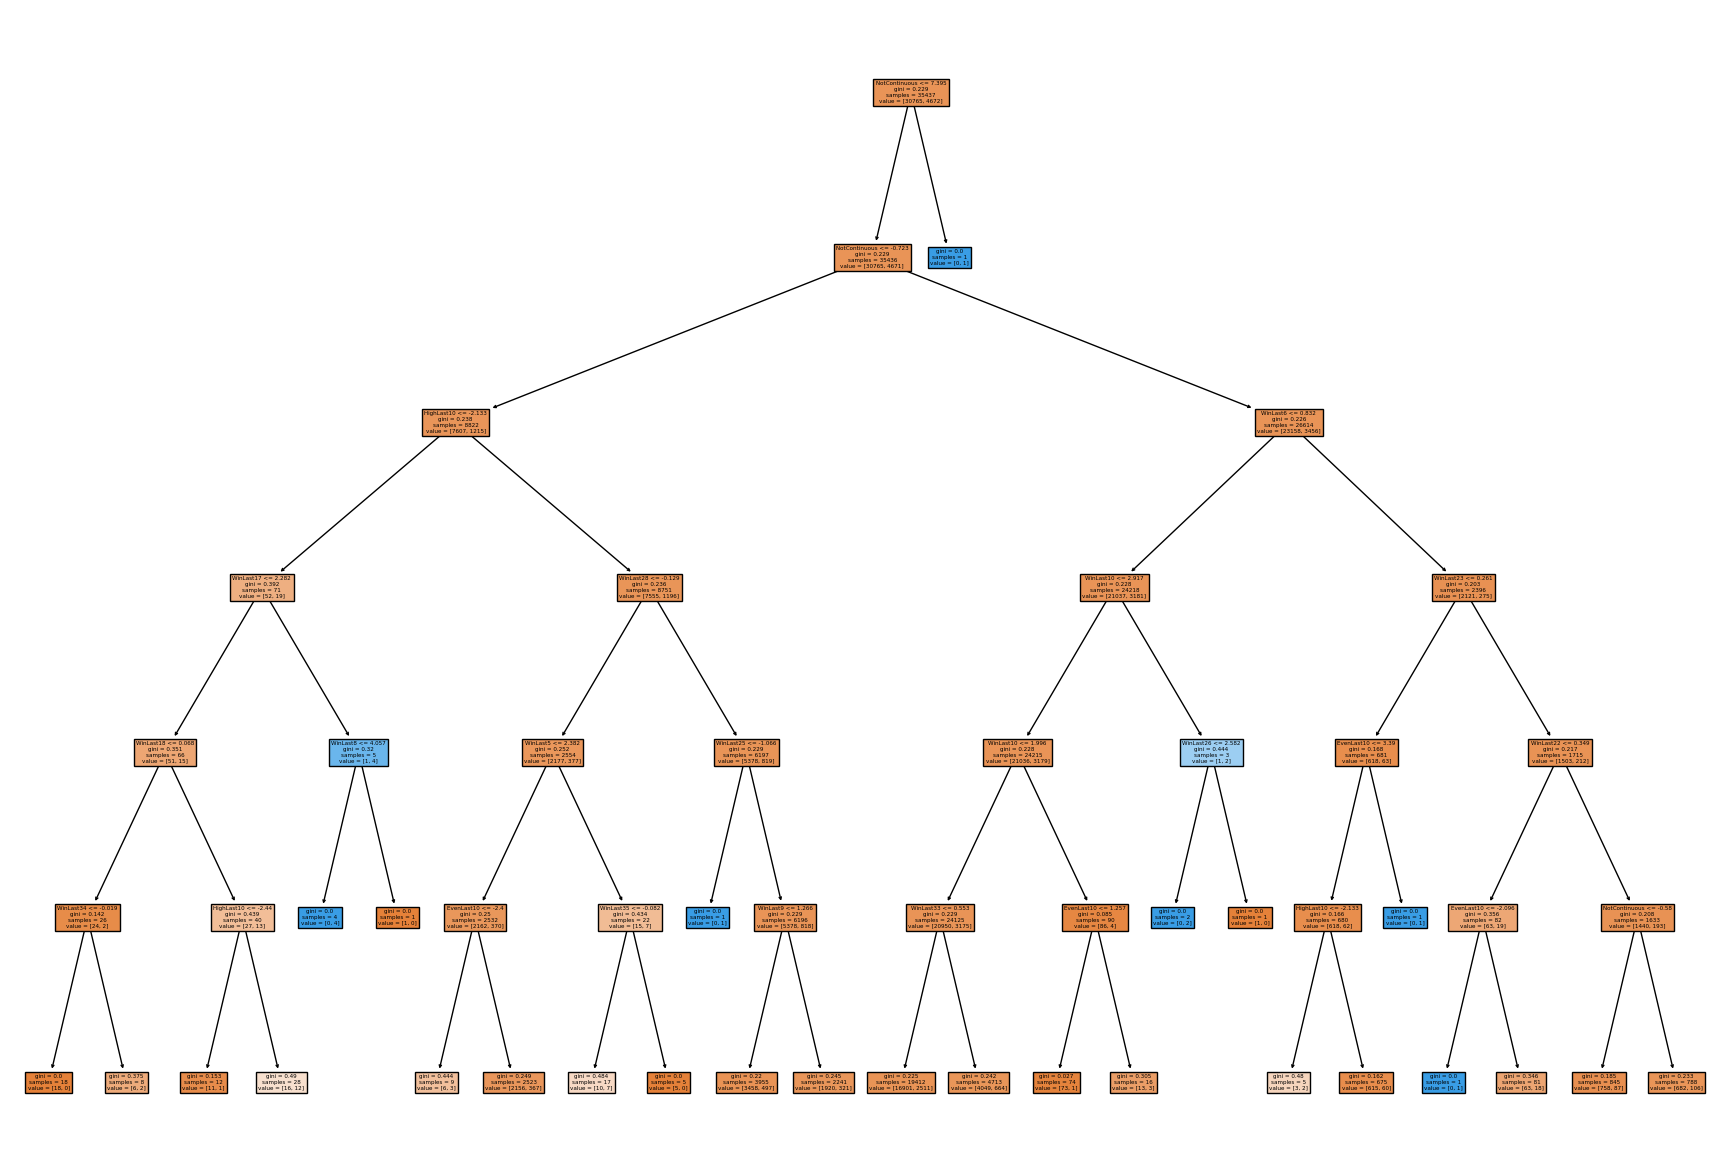

In [ ]:
plt.figure(figsize=(22,15))
plot_tree(dt, max_depth=6, filled=True, feature_names=['Even',
 'High',
 'WinLast5',
 'WinLast6',
 'WinLast7',
 'WinLast8',
 'WinLast9',
 'WinLast10',
 'WinLast11',
 'WinLast12',
 'WinLast13',
 'WinLast14',
 'WinLast15',
 'WinLast16',
 'WinLast17',
 'WinLast18',
 'WinLast19',
 'WinLast20',
 'WinLast21',
 'WinLast22',
 'WinLast23',
 'WinLast24',
 'WinLast25',
 'WinLast26',
 'WinLast27',
 'WinLast28',
 'WinLast29',
 'WinLast30',
 'WinLast31',
 'WinLast32',
 'WinLast33',
 'WinLast34',
 'WinLast35',
 'Continuous',
 'NotContinuous',
 'EvenLast10',
 'HighLast10'])
plt.show()

In [ ]:
#특성 중 중요한것
for i in range(len(dt.feature_importances_)):
  print(target_cols[i])
  print(dt.feature_importances_[i])

Even
0.0
High
0.0
WinLast5
0.03636753349757291
WinLast6
0.03373610858771364
WinLast7
0.0
WinLast8
0.0450627300850004
WinLast9
0.02489086598500096
WinLast10
0.08680249503340237
WinLast11
0.0
WinLast12
0.0
WinLast13
0.0
WinLast14
0.0
WinLast15
0.0
WinLast16
0.0
WinLast17
0.0858773891040492
WinLast18
0.05462477355364918
WinLast19
0.0
WinLast20
0.0
WinLast21
0.0
WinLast22
0.05667710632666188
WinLast23
0.026563697768117574
WinLast24
0.0
WinLast25
0.04243030983345132
WinLast26
0.03755227507083367
WinLast27
0.0
WinLast28
0.024320803063917075
WinLast29
0.0
WinLast30
0.0
WinLast31
0.0
WinLast32
0.0
WinLast33
0.028417286886965393
WinLast34
0.019498296671394362
WinLast35
0.036899628578960904
Continuous
0.0
NotContinuous
0.08843243118127789
EvenLast10
0.12037812722525074
HighLast10
0.15146814154678057
